In [1]:
import matplotlib.pyplot as plt
import numpy as np
import nltk
import os
import pandas as pd
import seaborn as sns
import statistics
import sys
import functools

from nltk.stem.snowball import FrenchStemmer

# get data

## Dictionnaire

In [2]:
os.chdir('/home/garance/Bureau/OpenClassroom/Données textuelles/datas')

In [3]:
files = [x for x in os.listdir('/home/garance/Bureau/OpenClassroom/Données textuelles/datas') if x[-4:]==".txt"]

In [4]:
labels_values = [x.split(".")[0] for x in files]
labels = ["".join(x.split("-")[:-1]) for x in labels_values]
values = [int(x.split("-")[-1]) for x in labels_values]
df=pd.DataFrame(index=labels)
df['songs']=values

In [5]:
lyrics = []
for file in range(len(files)):
    f = open(files[file])
    f = f.read()
    lyrics.append(f)
df['lyrics']=lyrics

In [6]:
df.describe()

,songs
count,262.000000
mean,79.374046
std,81.749485
min,1.000000
25%,21.250000
50%,52.000000
75%,111.000000
max,586.000000


In [7]:
print("nombre de morceaux dans la db :",df.songs.sum(),"\t pour :",df.songs.count(),"artistes")

nombre de morceaux dans la db : 20796 	 pour : 262 artistes


## Analyse par morceaux

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


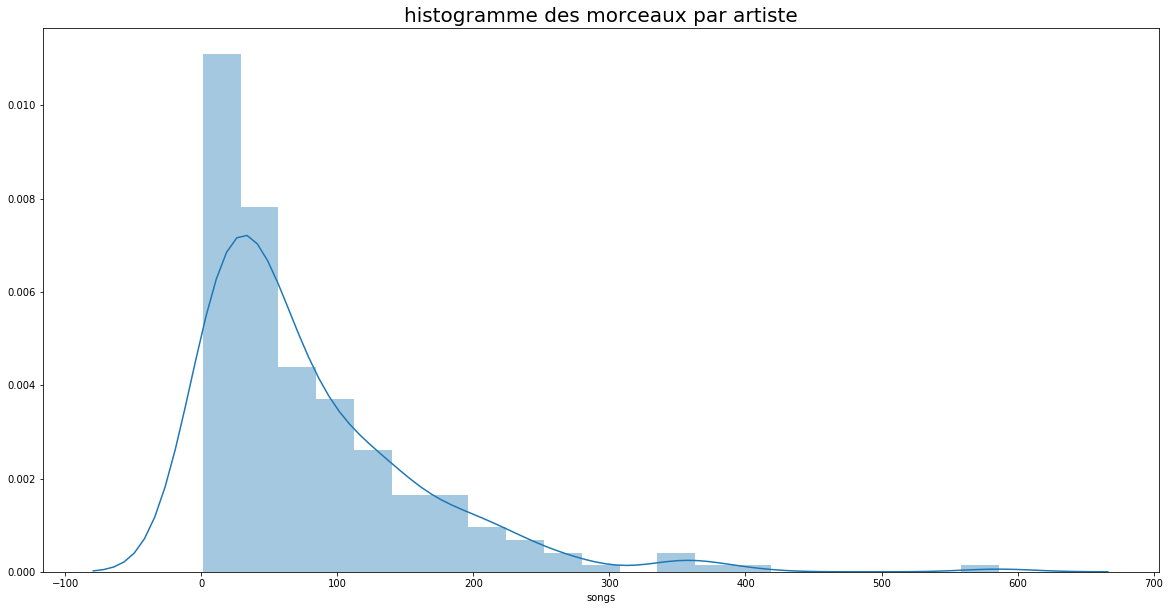

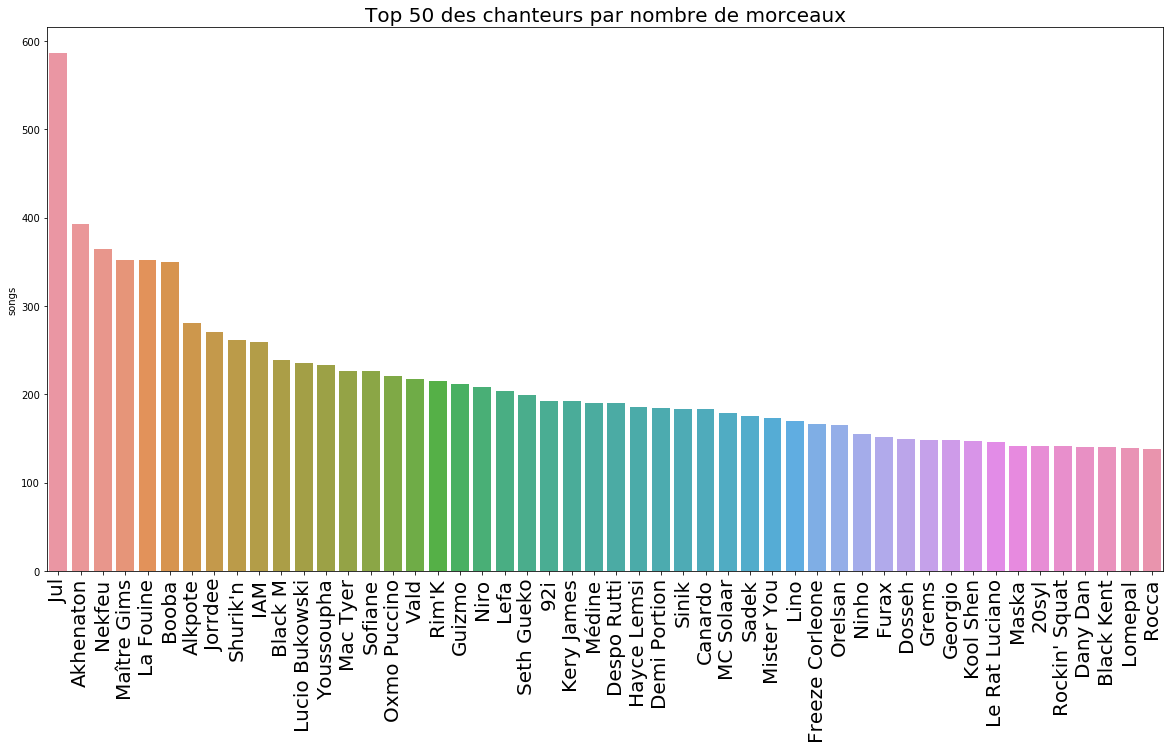

In [8]:
plt.figure(figsize=(20,10))
sns.distplot(df.songs)
plt.title("histogramme des morceaux par artiste", fontsize=20)
plt.show()

top_50_songs = df.sort_values(by=['songs'], ascending=False)[:50]
plt.figure(figsize=(20,10))
sns.barplot(np.arange(top_50_songs.shape[0]),top_50_songs["songs"])
plt.xticks(np.arange(top_50_songs.shape[0]),top_50_songs.index, rotation=90,fontsize=20)
plt.title("Top 50 des chanteurs par nombre de morceaux",fontsize=20)
plt.show()

# Tokenisation

In [9]:
tokeniser = nltk.RegexpTokenizer(r'\w+')

In [10]:
words = [tokeniser.tokenize(lyric.lower()) for lyric in df['lyrics']]
df["words"]=words

long = [len(x) for x in df['words']]
df['nb_word']=long

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


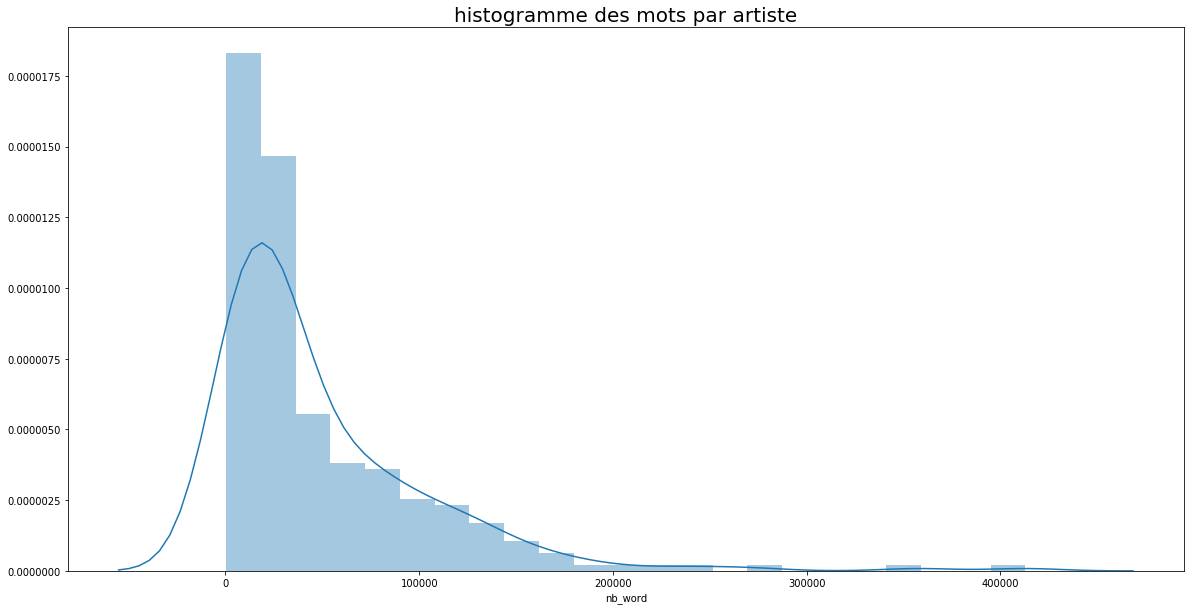

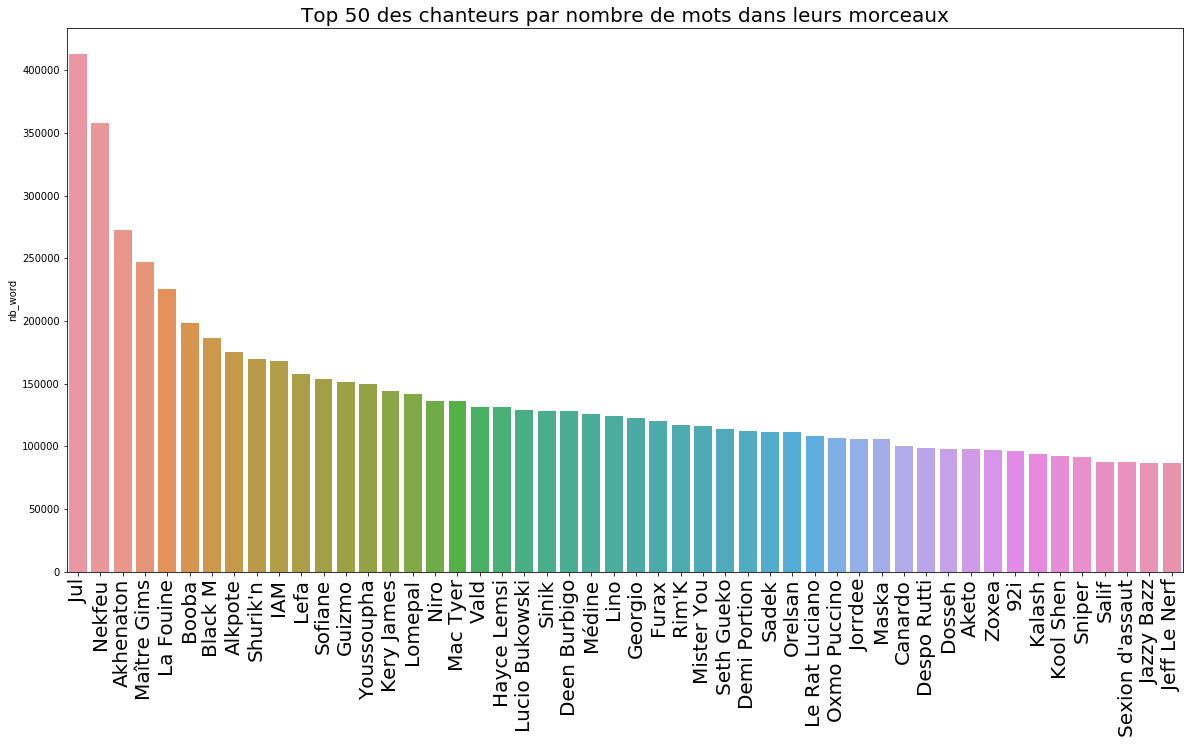

In [11]:
plt.figure(figsize=(20,10))
sns.distplot(df['nb_word'])
plt.title("histogramme des mots par artiste", fontsize=20)
plt.show()

top_50_words = df.sort_values(by=['nb_word'], ascending=False)[:50]
plt.figure(figsize=(20,10))
sns.barplot(np.arange(top_50_words.shape[0]),top_50_words["nb_word"])
plt.xticks(np.arange(top_50_words.shape[0]),top_50_words.index, rotation=90,fontsize=20)
plt.title("Top 50 des chanteurs par nombre de mots dans leurs morceaux",fontsize=20)
plt.show()

# Mots Uniques

In [12]:
unique = [list(set(word)) for word in df.words]
df["unique"]=unique

long = [len(x) for x in df['unique']]
df['nb_unique']=long

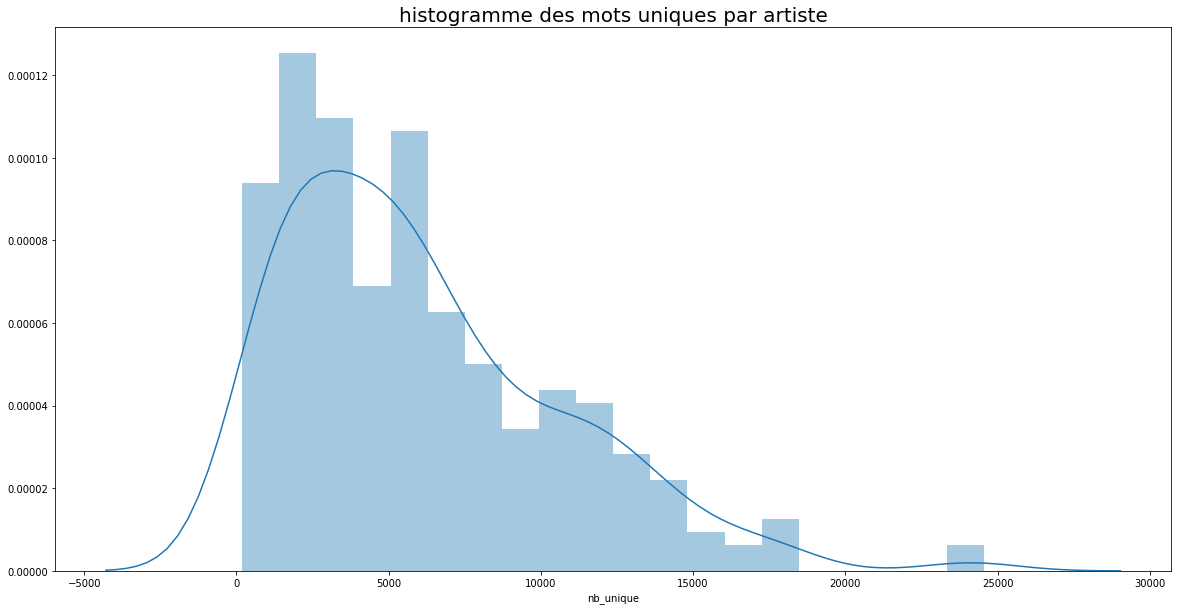

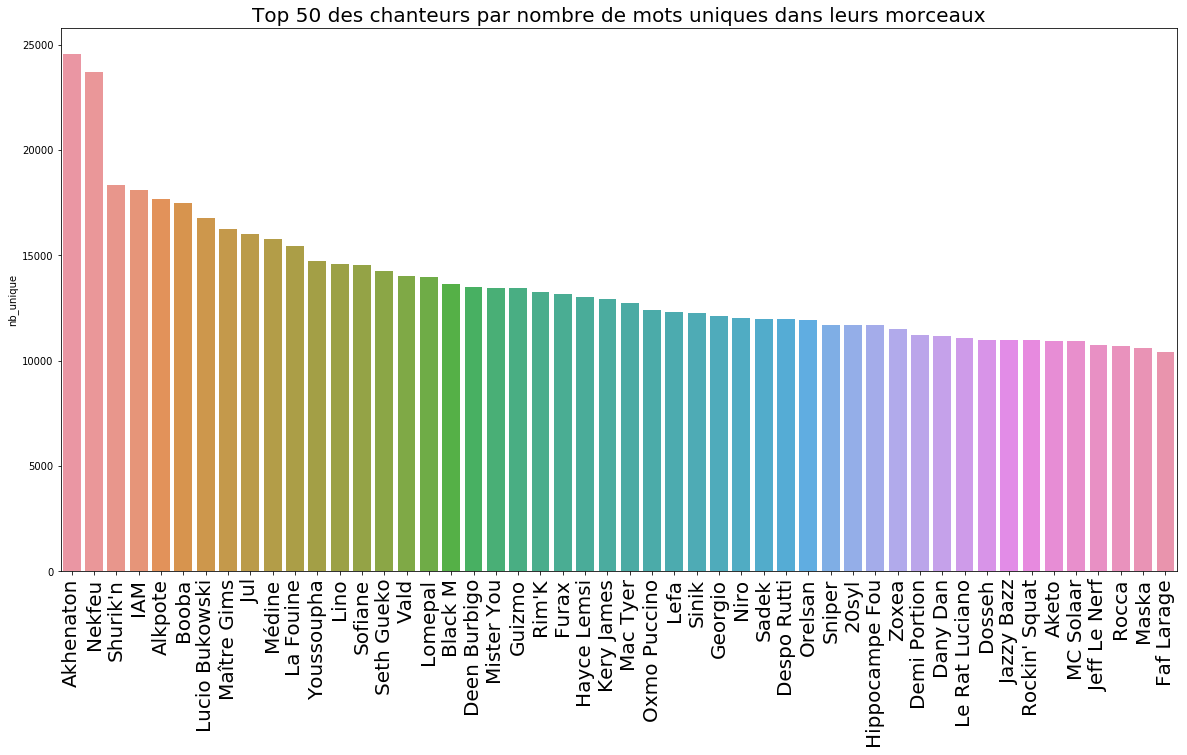

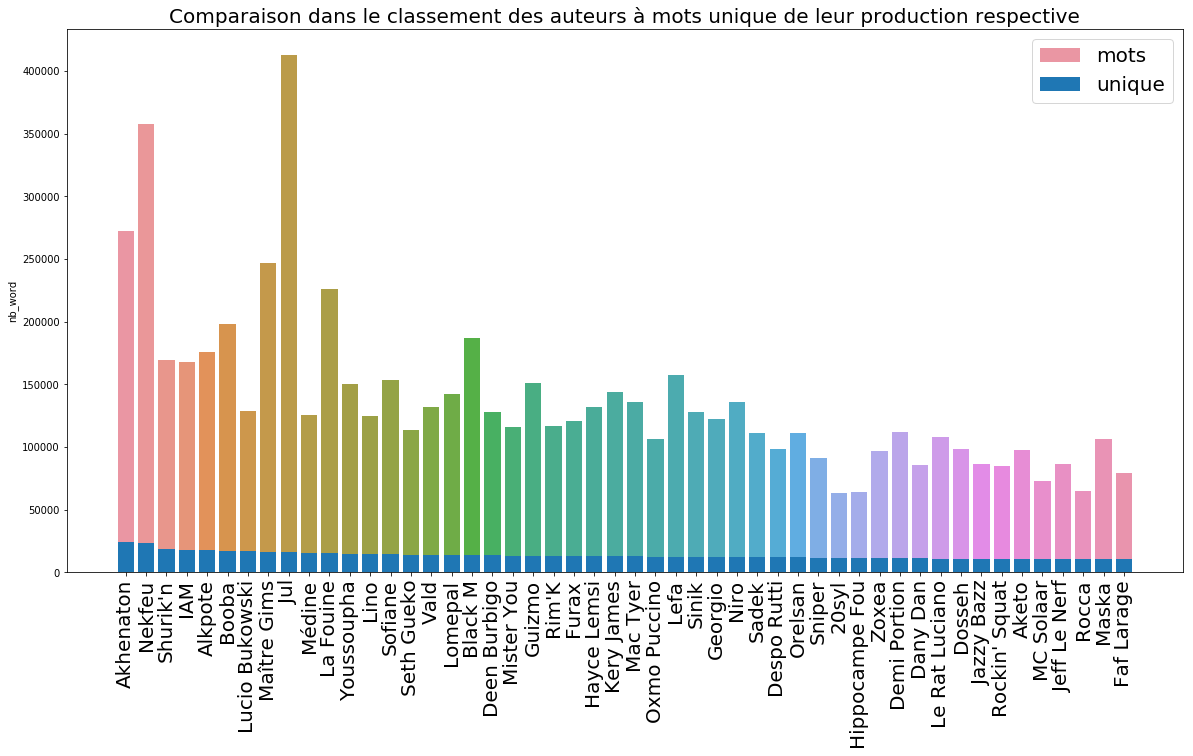

In [13]:
plt.figure(figsize=(20,10))
sns.distplot(df['nb_unique'],bins=20)
plt.title("histogramme des mots uniques par artiste", fontsize=20)
plt.show()

top_50_words = df.sort_values(by=['nb_unique'], ascending=False)[:50]
plt.figure(figsize=(20,10))
sns.barplot(np.arange(top_50_words.shape[0]),top_50_words["nb_unique"])
plt.xticks(np.arange(top_50_words.shape[0]),top_50_words.index, rotation=90,fontsize=20)
plt.title("Top 50 des chanteurs par nombre de mots uniques dans leurs morceaux",fontsize=20)
plt.show()

plt.figure(figsize=(20,10))
sns.barplot(np.arange(top_50_words.shape[0]),top_50_words["nb_word"],label="mots")
plt.bar(np.arange(top_50_words.shape[0]),top_50_words["nb_unique"],label='unique')
plt.xticks(np.arange(top_50_words.shape[0]),top_50_words.index, rotation=90, fontsize=20)
plt.title("Comparaison dans le classement des auteurs à mots unique de leur production respective",fontsize=20)
plt.legend(loc='best',fontsize=20)
plt.show()

# Suppression des Stop words

## Constitution du corpus

In [14]:
words = [x for x in df.words]
words = functools.reduce(lambda x,y :x+y ,words)

dict_count_word = dict()
for word in words:
    if word in dict_count_word:
        dict_count_word[word] += 1
    else:
        dict_count_word[word] = 1

In [15]:
most_freq = [x[0] for x in sorted(dict_count_word.items(), key=lambda x:x[1])[::-1][:100]]
nltk.download('stopwords')
most_freq += nltk.corpus.stopwords.words('french')
most_freq = list(set(most_freq))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/garance/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Traitement

In [16]:
unique_nonstop = [list(set([x for x in y  if x not in most_freq])) for y in df.unique]
nb_unique_nonstop=[len(x) for x in unique_nonstop]

df["unique_nonstop"] = unique_nonstop
df["nb_unique_nonstop"]=nb_unique_nonstop

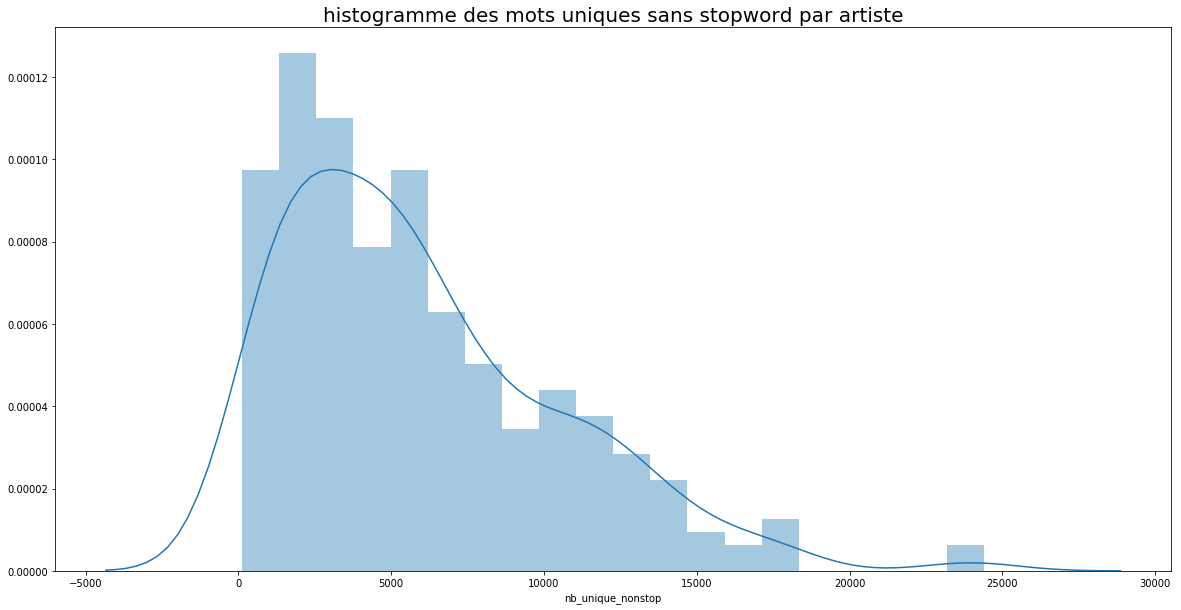

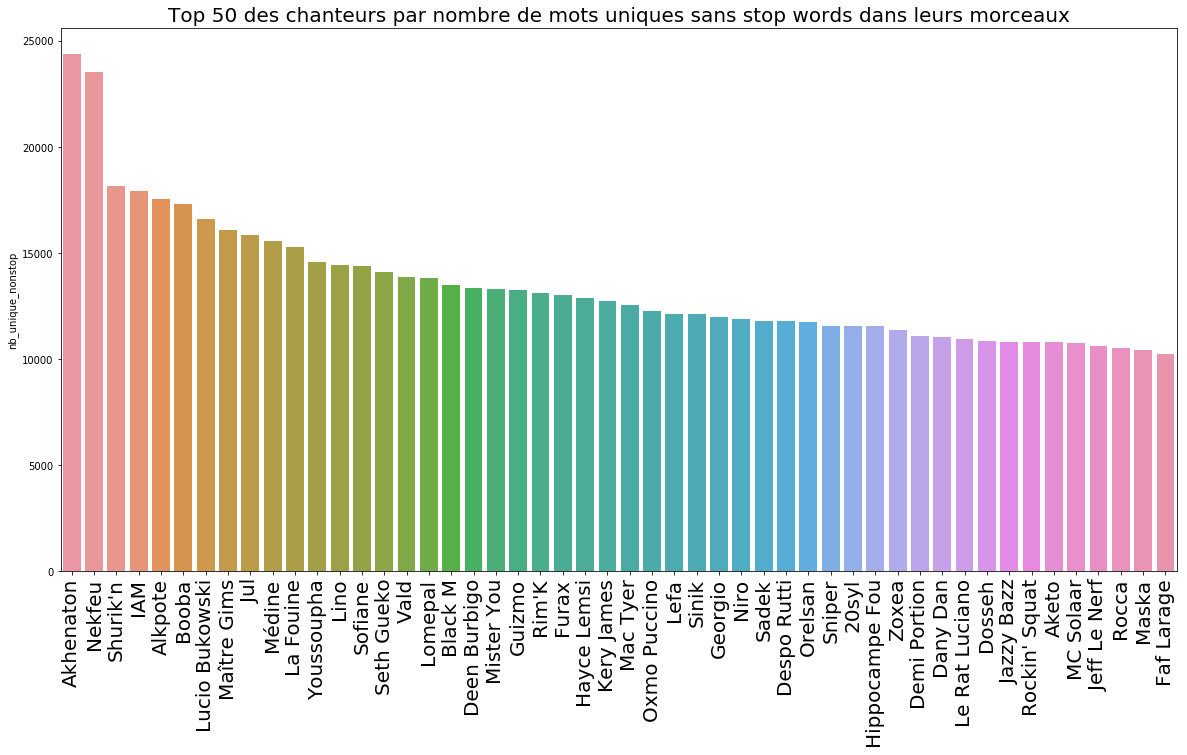

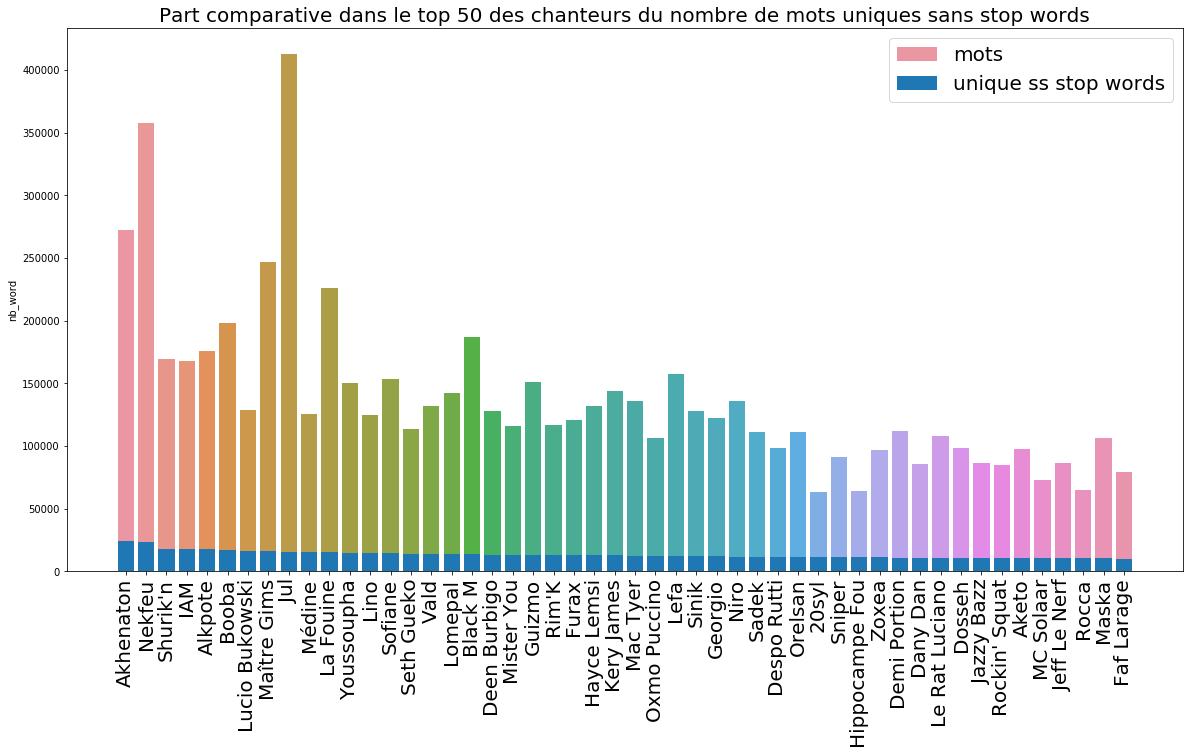

In [17]:
plt.figure(figsize=(20,10))
sns.distplot(df['nb_unique_nonstop'],bins=20)
plt.title("histogramme des mots uniques sans stopword par artiste", fontsize=20)
plt.show()

top_50_words = df.sort_values(by=['nb_unique'], ascending=False)[:50]
plt.figure(figsize=(20,10))
sns.barplot(np.arange(top_50_words.shape[0]),top_50_words["nb_unique_nonstop"])
plt.xticks(np.arange(top_50_words.shape[0]),top_50_words.index, rotation=90,fontsize=20)
plt.title("Top 50 des chanteurs par nombre de mots uniques sans stop words dans leurs morceaux",fontsize=20)
plt.show()

top_50_words = df.sort_values(by=['nb_unique_nonstop'], ascending=False)[:50]
plt.figure(figsize=(20,10))
sns.barplot(np.arange(top_50_words.shape[0]),top_50_words["nb_word"],label="mots")
plt.bar(np.arange(top_50_words.shape[0]),top_50_words["nb_unique_nonstop"],label='unique ss stop words')
plt.xticks(np.arange(top_50_words.shape[0]),top_50_words.index, rotation=90, fontsize=20)
plt.title("Part comparative dans le top 50 des chanteurs du nombre de mots uniques sans stop words",fontsize=20)
plt.legend(loc='best',fontsize=20)
plt.show()

# Lemmatisation (stemming)

In [18]:
stemmer = FrenchStemmer()

lemmat = [list(set([stemmer.stem(x) for x in y])) for y in df.unique_nonstop]
nb_lemmat = [len(x) for x in lemmat]

df["unique_nonstop_lemmat"] = lemmat
df["nb_unique_nonstop_lemmat"]=nb_lemmat

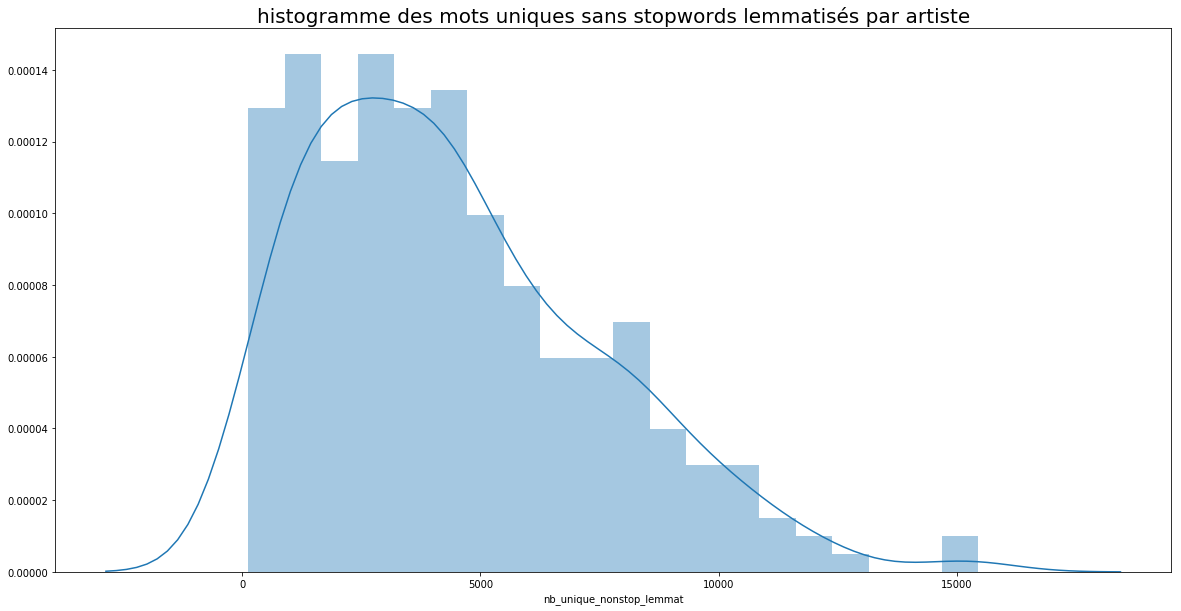

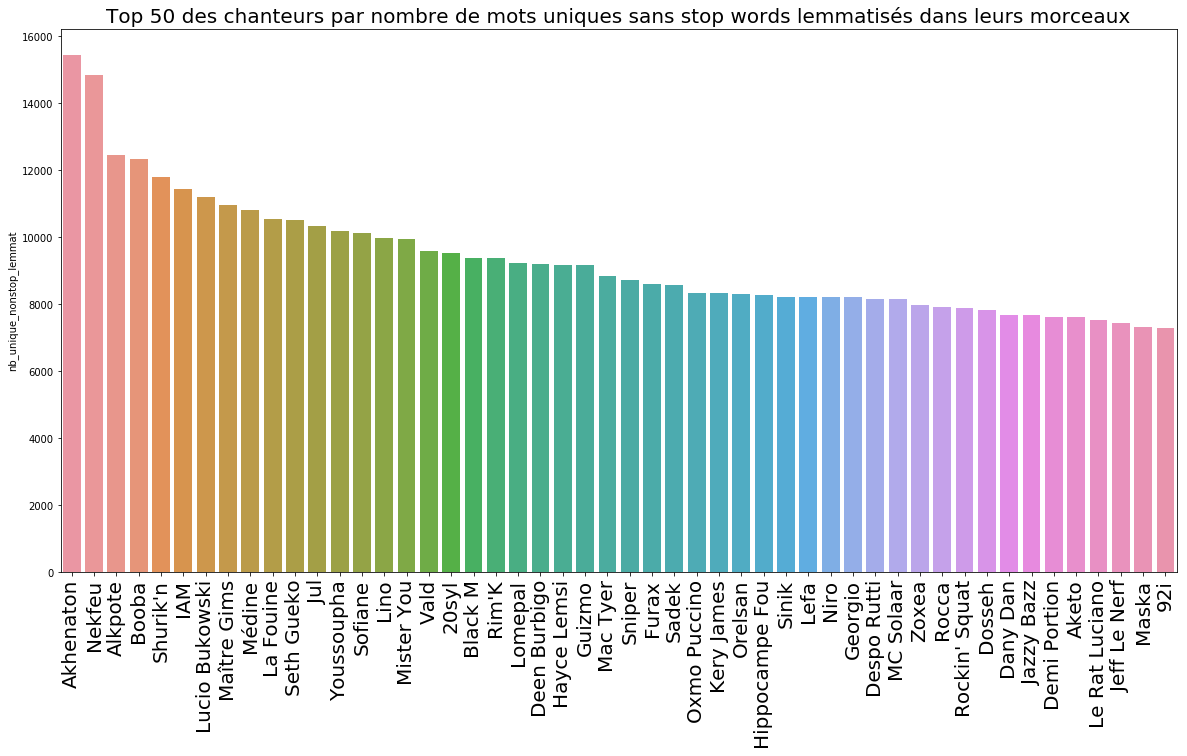

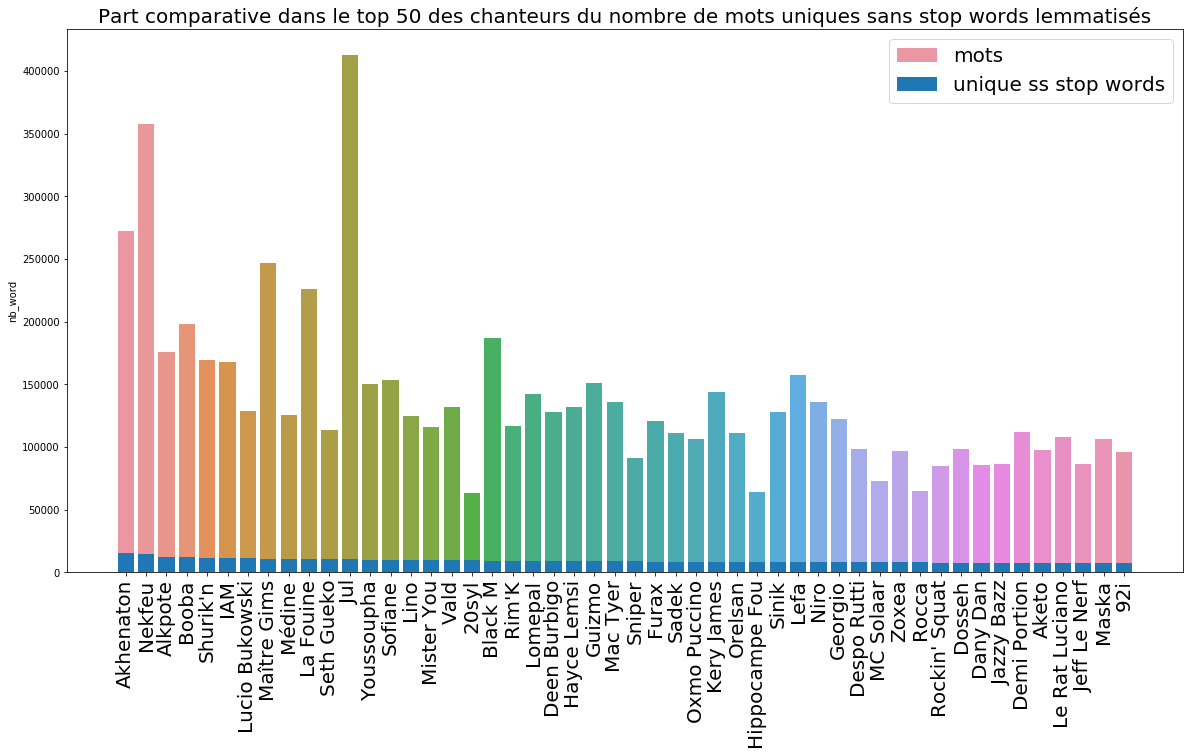

In [19]:
plt.figure(figsize=(20,10))
sns.distplot(df['nb_unique_nonstop_lemmat'],bins=20)
plt.title("histogramme des mots uniques sans stopwords lemmatisés par artiste", fontsize=20)
plt.show()

top_50_words = df.sort_values(by=['nb_unique_nonstop_lemmat'], ascending=False)[:50]
plt.figure(figsize=(20,10))
sns.barplot(np.arange(top_50_words.shape[0]),top_50_words["nb_unique_nonstop_lemmat"])
plt.xticks(np.arange(top_50_words.shape[0]),top_50_words.index, rotation=90,fontsize=20)
plt.title("Top 50 des chanteurs par nombre de mots uniques sans stop words lemmatisés dans leurs morceaux",fontsize=20)
plt.show()

plt.figure(figsize=(20,10))
sns.barplot(np.arange(top_50_words.shape[0]),top_50_words["nb_word"],label="mots")
plt.bar(np.arange(top_50_words.shape[0]),top_50_words["nb_unique_nonstop_lemmat"],label='unique ss stop words')
plt.xticks(np.arange(top_50_words.shape[0]),top_50_words.index, rotation=90, fontsize=20)
plt.title("Part comparative dans le top 50 des chanteurs du nombre de mots uniques sans stop words lemmatisés",fontsize=20)
plt.legend(loc='best',fontsize=20)
plt.show()

# Ratios de mots uniques sans stopwords lemmatisés par chansons

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


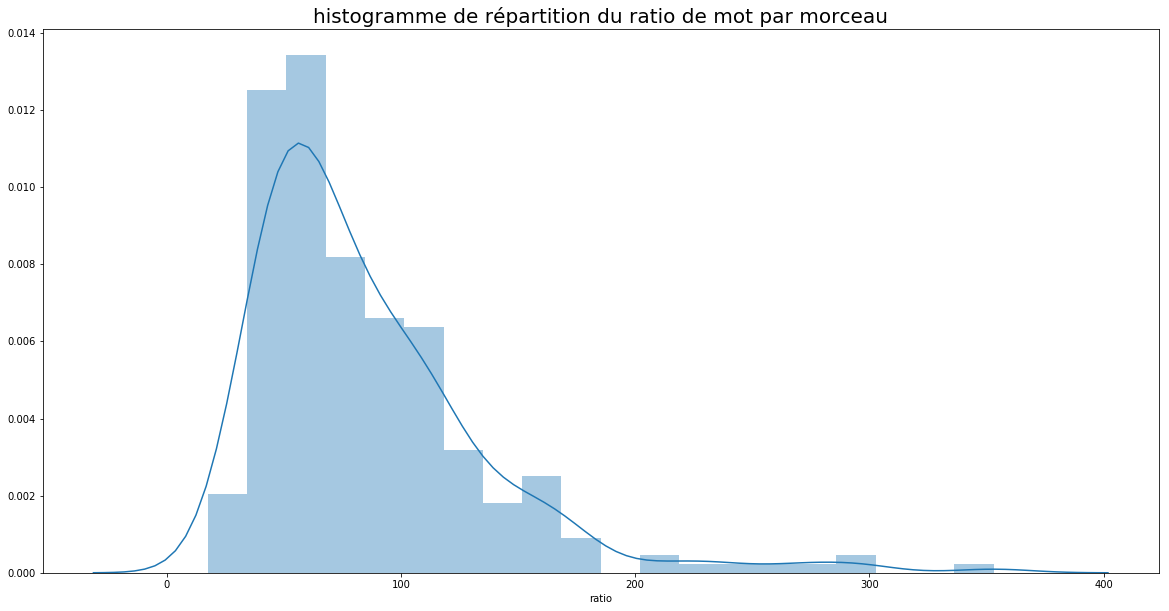

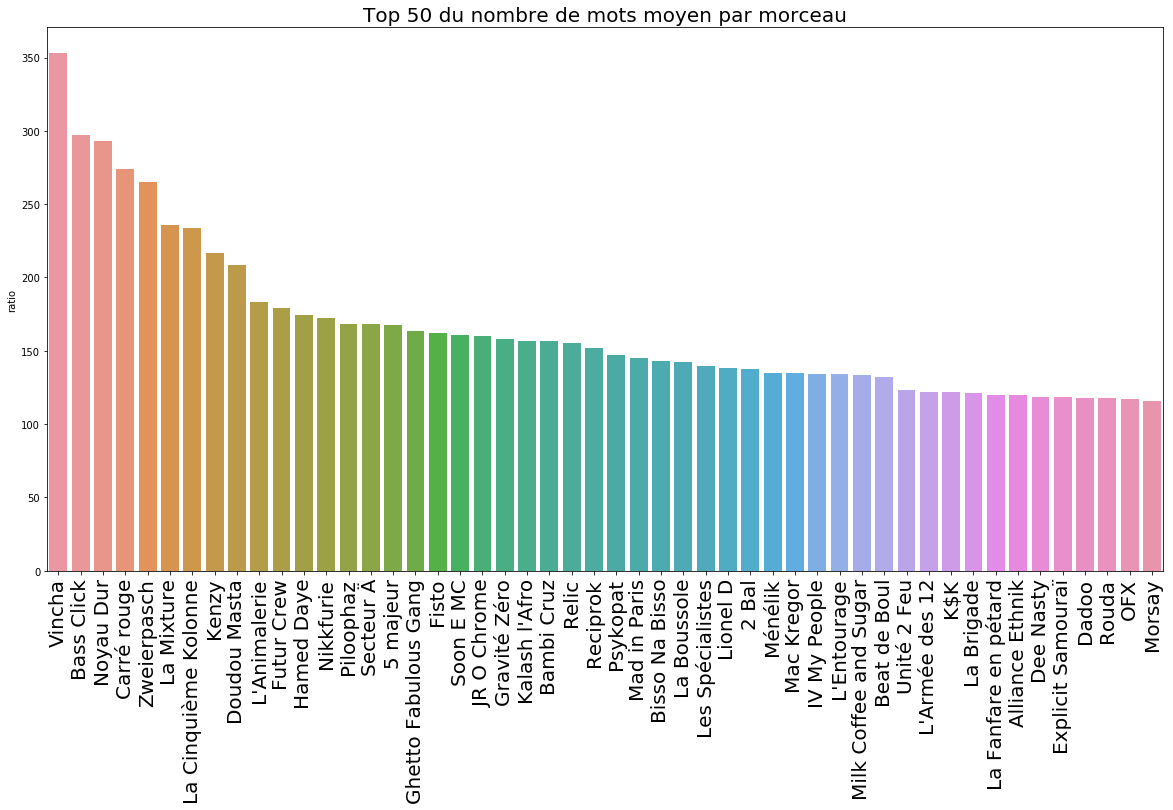

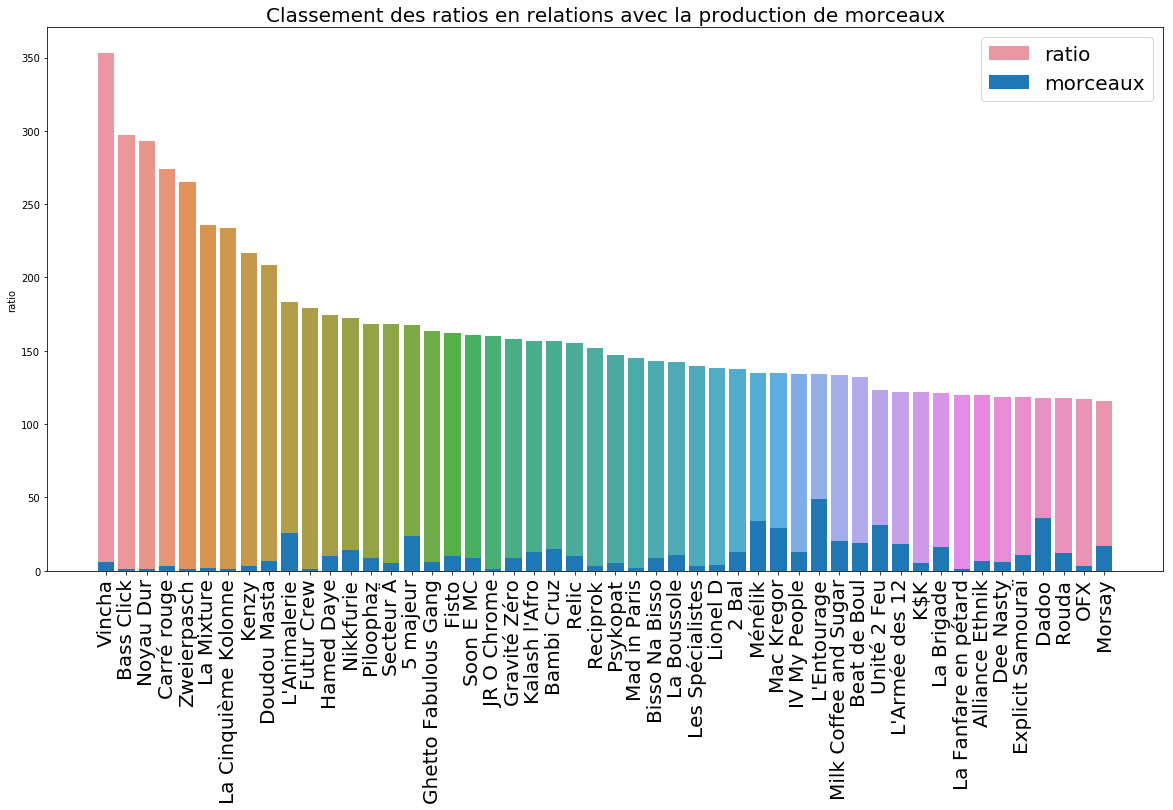

In [27]:
df["ratio"]=df.nb_unique_nonstop_lemmat/df.songs

plt.figure(figsize=(20,10))
plt.title("histogramme de répartition du ratio de mot par morceau",fontsize=20)
sns.distplot(df.ratio)
plt.show()

plt.figure(figsize=(20,10))
plt.title("Top 50 du nombre de mots moyen par morceau",fontsize=20)
sns.barplot(np.arange(50),df.sort_values(by="ratio",ascending=False).ratio[:50])
plt.xticks(np.arange(50),df.sort_values(by="ratio",ascending=False).index,rotation=90,fontsize=20)
plt.show()

plt.figure(figsize=(20,10))
sns.barplot(np.arange(50),df.sort_values(by="ratio",ascending=False).ratio[:50], label="ratio")
plt.bar(np.arange(top_50_words.shape[0]),df.sort_values(by="ratio",ascending=False).songs[:50],label='morceaux')
plt.xticks(np.arange(top_50_words.shape[0]),df.sort_values(by="ratio",ascending=False).index[:50], rotation=90, fontsize=20)
plt.title("Classement des ratios en relations avec la production de morceaux",fontsize=20)
plt.legend(loc='best',fontsize=20)
plt.show()

In [25]:
df.sort_values(by="ratio",ascending=False)

,songs,lyrics,words,nb_word,unique,nb_unique,unique_nonstop,nb_unique_nonstop,unique_nonstop_lemmat,nb_unique_nonstop_lemmat,ratio
Vincha,6,\n\n\nLes p'tits seins : \n\n\n[Couplet 1]\n\n...,"[les, p, tits, seins, couplet, 1, on, les, tie...",8944,"[date, compris, aurais, demande, dont, lire, p...",2574,"[date, compris, demande, dont, lire, pisser, i...",2452,"[planch, traîtr, chi, dont, franc, allemand, g...",2118,353.000000
Bass Click,1,\n\n\nBiatch : \n\n\n[Adams G] :\n\nCrame ton ...,"[biatch, adams, g, crame, ton, slip, chérie, d...",900,"[bandits, battre, baise, tatasse, blague, sexi...",396,"[dés, enfuit, bandits, fier, bébé, tapais, mal...",315,"[préliminair, enfuit, voic, mal, 000, mental, ...",297,297.000000
Noyau Dur,1,\n\n\nBesoin d'ennemi : \n\n\n[Couplet 1: Lino...,"[besoin, d, ennemi, couplet, 1, lino, paraît, ...",977,"[dessus, couplet, cris, crèves, condamner, glo...",392,"[dessus, ceux, enfer, clique, lino, devenus, m...",304,"[dessus, ceux, enfer, détermin, lino, devenus,...",293,293.000000
Carré rouge,3,\n\n\nCarré rouge : \n\n\n[Intro: DJ Soon]\n(s...,"[carré, rouge, intro, dj, soon, scratches, car...",3181,"[dessus, couplet, doit, or, compris, artifice,...",1017,"[dessus, doit, or, compris, artifice, accepté,...",910,"[dessus, détermin, doit, or, avril, vélodrom, ...",822,274.000000
Zweierpasch,1,\n\n\nGrenzgänger/Frontalier : \n\n\n[Intro: C...,"[grenzgänger, frontalier, intro, charles, de, ...",643,"[berlin, stetem, diesem, poteau, dazwischenfis...",334,"[berlin, stetem, diesem, dazwischenfischen, em...",279,"[berlin, stetem, port, manch, frontali, diesem...",265,265.000000
La Mixture,2,\n\n\nLe dos au mur : \n\n\n[Intro]\nLe quotid...,"[le, dos, au, mur, intro, le, quotidien, est, ...",1472,"[couplet, doit, revois, battre, vie, ouais, br...",595,"[doit, revois, battre, brêche, monopoly, avale...",496,"[impossibl, doit, revois, pal, sacrific, compt...",472,236.000000
La Cinquième Kolonne,1,\n\n\nKadavres en sursis : \n\n\n[Refrain] x2\...,"[kadavres, en, sursis, refrain, x2, il, parait...",609,"[crypte, sursaute, enfer, altérée, soir, mal, ...",324,"[altérée, crypte, sursaute, enfer, soir, mal, ...",243,"[débin, ceux, enfer, soir, impossibl, voudr, m...",234,234.000000
Kenzy,3,\n\n\nB : \n\n\nUnda Unda\n\nYa é unda unda un...,"[b, unda, unda, ya, é, unda, unda, underground...",1290,"[sabe, or, hèn, yàng, omoele, 人之初, yīrán, atte...",671,"[sabe, or, hèn, yàng, omoele, 人之初, yīrán, atte...",654,"[voic, or, yàng, shānghen, rubb, wann, camisol...",650,216.666667
Doudou Masta,7,\n\n\nLa solidarité noire : \n\n\n[Intro]\n- Q...,"[la, solidarité, noire, intro, qu, est, ce, qu...",6220,"[dealers, suprématie, basculer, servir, quarti...",1798,"[dealers, suprématie, basculer, servir, quarti...",1673,"[planch, brouss, perturb, randon, calibr, séné...",1459,208.428571
L'Animalerie,26,\n\n\n62 : \n\n\n[Couplet 1 : Missak]\nJe risq...,"[62, couplet, 1, missak, je, risque, la, mort,...",30725,"[quadrillage, date, reluqué, comité, cata, tib...",6283,"[quadrillage, date, reluqué, comité, cata, tib...",6144,"[népal, piqu, voic, emphas, planch, session, a...",4770,183.461538


In [37]:
df[np.logical_or(df.index == "Akhenaton",df.index == "Vincha")]

,songs,lyrics,words,nb_word,unique,nb_unique,unique_nonstop,nb_unique_nonstop,unique_nonstop_lemmat,nb_unique_nonstop_lemmat,ratio
Akhenaton,393,\n\n\nIl pleut autour du monde : \n\n\n[Couple...,"[il, pleut, autour, du, monde, couplet, 1, akh...",272302,"[fendu, prisu, conteur, basculer, grace, mains...",24563,"[fendu, prisu, conteur, basculer, grace, mains...",24405,"[versaill, gais, piqu, railler, rasad, hasn, e...",15453,39.320611
Vincha,6,\n\n\nLes p'tits seins : \n\n\n[Couplet 1]\n\n...,"[les, p, tits, seins, couplet, 1, on, les, tie...",8944,"[date, compris, aurais, demande, dont, lire, p...",2574,"[date, compris, demande, dont, lire, pisser, i...",2452,"[planch, traîtr, chi, dont, franc, allemand, g...",2118,353.000000
